# Import libraries 

In [98]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white')

# Load data 

In [99]:
train =  pd.read_csv("loan_train.csv")

# Understanding the Data

In [100]:
train.shape

(614, 13)

In [101]:
# Features in the dataset
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [102]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [103]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [104]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Univariate Analysis

### Univariate Analysis for Categorical Variables 

In [105]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [106]:
# Normalize can be set to True to print proportions instead of number 
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

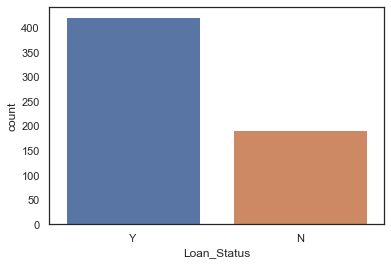

In [107]:
# Bar graph for loan_status
sns.countplot(x="Loan_Status", data=train)

In [108]:
train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [109]:
# count number of null values 
train['Gender'].isnull().sum()

13

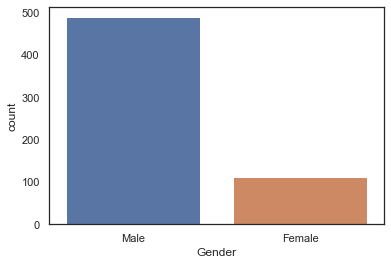

In [110]:
# Bar Graph for Gender
sns.countplot(x="Gender",data=train)

In [111]:
train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

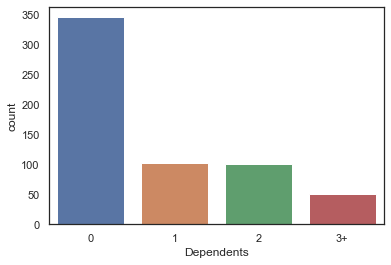

In [112]:
# Bar graph for dependents 
sns.countplot(x="Dependents", data=train)

In [113]:
train['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

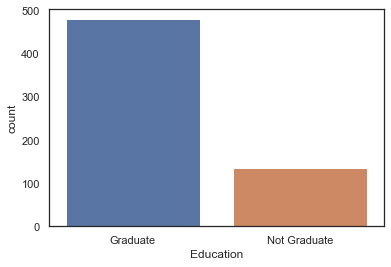

In [114]:
sns.countplot("Education", data=train)

In [115]:
train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

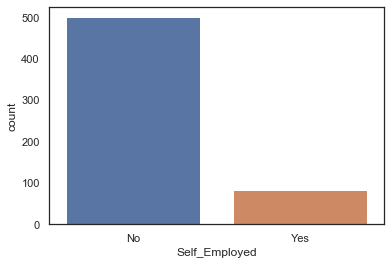

In [116]:
# Bar graph of Self_Employed
sns.countplot("Self_Employed",data=train)

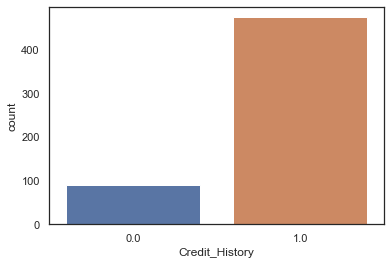

In [117]:
# Bar graph of Credit_History
sns.countplot(x='Credit_History',data=train)

In [118]:
train['Credit_History'].value_counts(normalize=True)

1.0    0.842199
0.0    0.157801
Name: Credit_History, dtype: float64

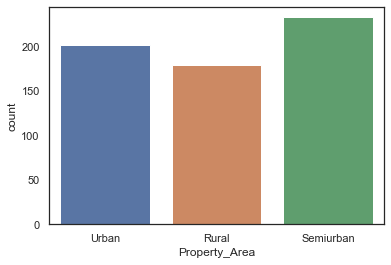

In [119]:
# Bar graph of Property_Area
sns.countplot(x='Property_Area',data=train)

In [120]:
train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

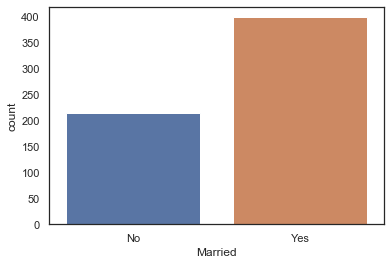

In [121]:
# Bar Graph for Married
sns.countplot(x="Married",data=train)

In [122]:
train.pivot_table(columns="Married",index="Dependents", values="Loan_ID", aggfunc=len)

Married,No,Yes
Dependents,,
0,171,174
1,23,79
2,8,93
3+,7,44


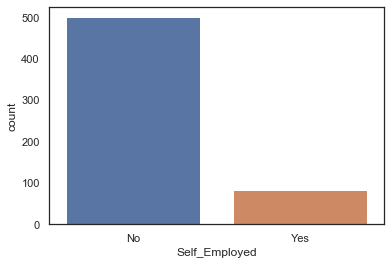

In [123]:
# Bar Graph for Self_Employed
sns.countplot(x="Self_Employed",data=train)

In [124]:
print(train['Self_Employed'].isnull().sum())   # Missing count 
print(train['Gender'].isnull().sum())   # Missing count 
print(train['Married'].isnull().sum())   # Missing count 
print(train['Credit_History'].isnull().sum())   # Missing count 
print(train['Dependents'].isnull().sum())   # Missing count 
print(train['Property_Area'].isnull().sum())   # Missing count 
print(train['Education'].isnull().sum())   # Missing count 

32
13
3
50
15
0
0


###  Univariate Analysis for Continous Variables 

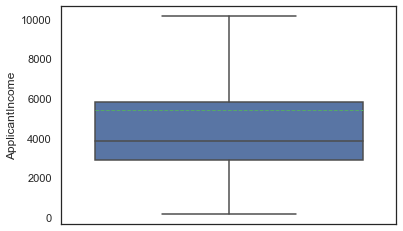

In [125]:
# Visualizing numerical features
#plt.gcf().set_size_inches(5,8)
sns.boxplot(x="ApplicantIncome",data=train, orient='vertical', showfliers=False, meanline=True, showmeans=True)

#### display how many outliers in ApplicantIncome 

In [126]:
app_income = train["ApplicantIncome"]

In [127]:
q1,q2,q3 = app_income.quantile([0.25,0.5,0.75])
print(q1,q2,q3)

2877.5 3812.5 5795.0


In [128]:
iqr = q3 - q1

In [129]:
iqr

2917.5

In [130]:
print("Upper Limit     : ", (q3 + 1.5 * iqr))
print("Lower Limit     : ", (q1 - 1.5 * iqr))
print("Higher outliers : ", (app_income > (q3 + 1.5 * iqr)).sum())
print("Lower  outliers : ", (app_income < (q1 - 1.5 * iqr)).sum())

Upper Limit     :  10171.25
Lower Limit     :  -1498.75
Higher outliers :  50
Lower  outliers :  0


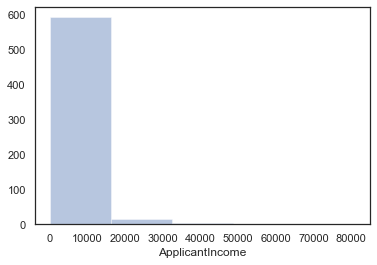

In [131]:
sns.distplot(train["ApplicantIncome"],bins=5,kde=False)    # Histogram
# plt.gcf().set_size_inches(10,5)

In [132]:
(train['ApplicantIncome'] < 10000).sum()

559

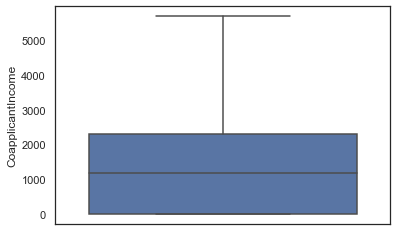

In [133]:
sns.boxplot(x="CoapplicantIncome",data=train, orient='vertical', showfliers=False)

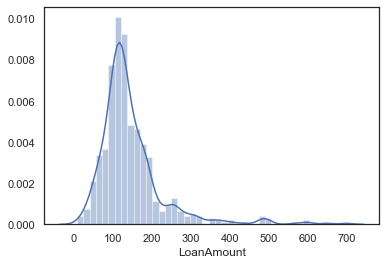

In [134]:
sns.distplot(train.loc[train['LoanAmount'].notna(),'LoanAmount'])

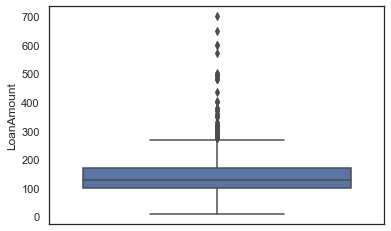

In [135]:
sns.boxplot(train["LoanAmount"], orient='vertical', showfliers = True)
#plt.gcf().set_size_inches(20,8)

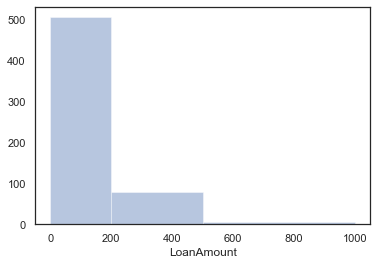

In [136]:
sns.distplot(train['LoanAmount'], bins=[0,200,500,1000], kde=False)

G:\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
G:\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


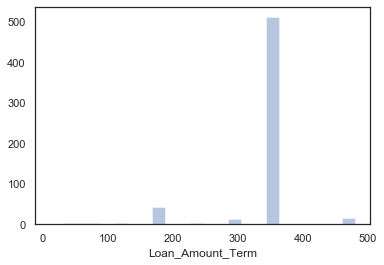

In [137]:
sns.distplot(train["Loan_Amount_Term"], kde=False)

##  Bivariate Ananlysis

In [138]:
property_group = train.pivot_table(index='Property_Area',columns="Loan_Status", values='Loan_ID',aggfunc=len)

In [139]:
property_group

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


In [140]:
property_group.iloc[:,0] / (property_group.iloc[:,0] + property_group.iloc[:,1])

Property_Area
Rural        0.385475
Semiurban    0.231760
Urban        0.341584
dtype: float64

In [141]:
train.groupby(['Property_Area','Loan_Status'])['Loan_ID'].count()

Property_Area  Loan_Status
Rural          N               69
               Y              110
Semiurban      N               54
               Y              179
Urban          N               69
               Y              133
Name: Loan_ID, dtype: int64

In [142]:
train.groupby(['Gender','Education'], as_index=False)['ApplicantIncome'].mean()

,Gender,Education,ApplicantIncome
0,Female,Graduate,4646.467391
1,Female,Not Graduate,4629.700000
2,Male,Graduate,5992.345745
3,Male,Not Graduate,3630.061947


In [143]:
d = train.groupby(by=["Loan_Status","Married"], as_index=False)['Loan_ID'].count()
# d.rename(columns={'Loan_ID':'Count'}, inplace=True)
print(d)
# sns.catplot(x="Loan_Status",y="Loan_ID", hue="Gender",col="Married", data=d, kind="bar")

  Loan_Status Married  Loan_ID
0           N      No       79
1           N     Yes      113
2           Y      No      134
3           Y     Yes      285


In [144]:
train.pivot_table(index = "Married", columns="Loan_Status", values='Loan_ID',aggfunc=len)

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,285


  Loan_Status Dependents  Loan_ID
0           N          0      107
1           N          1       36
2           N          2       25
3           N         3+       18
4           Y          0      238
5           Y          1       66
6           Y          2       76
7           Y         3+       33


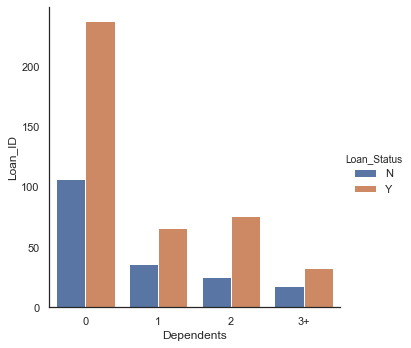

In [145]:
d = train.groupby(by=["Loan_Status","Dependents"], as_index=False)['Loan_ID'].count()
print(d)
sns.catplot(x="Dependents",y="Loan_ID", hue="Loan_Status", data=d, kind="bar")

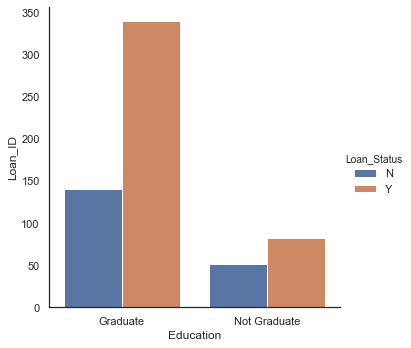

In [146]:
d = train.groupby(by=["Loan_Status","Education"], as_index=False)['Loan_ID'].count()
sns.catplot(x="Education",y="Loan_ID", hue="Loan_Status", data=d, kind="bar")

  Loan_Status Self_Employed  Loan_ID
0           N            No      157
1           N           Yes       26
2           Y            No      343
3           Y           Yes       56


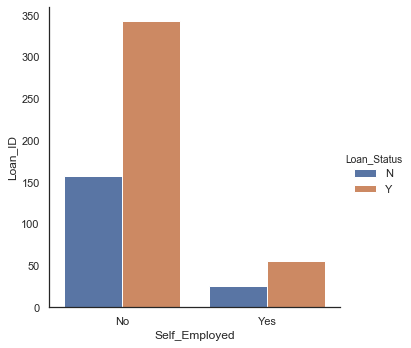

In [147]:
d = train.groupby(by=["Loan_Status","Self_Employed"], as_index=False)['Loan_ID'].count()
print(d)
sns.catplot(x="Self_Employed",y="Loan_ID", hue="Loan_Status", data=d, kind="bar")

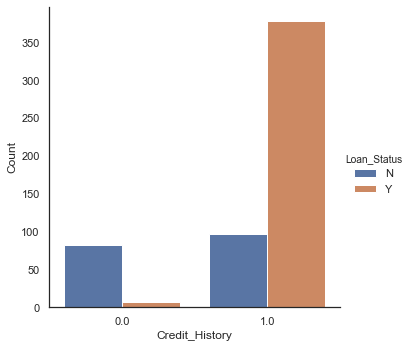

In [148]:
d = train.groupby(by=["Loan_Status","Credit_History"], as_index=False)['Loan_ID'].count()
d.rename(columns={'Loan_ID':'Count'}, inplace=True)
sns.catplot(x="Credit_History",y="Count", hue="Loan_Status", data=d, kind="bar")

  Loan_Status Property_Area  Count
0           N         Rural     69
1           N     Semiurban     54
2           N         Urban     69
3           Y         Rural    110
4           Y     Semiurban    179
5           Y         Urban    133


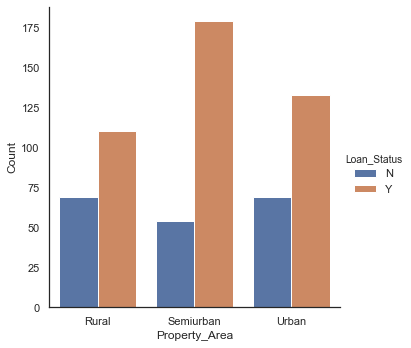

In [149]:
d = train.groupby(by=["Loan_Status","Property_Area"], as_index=False)['Loan_ID'].count()
d.rename(columns={'Loan_ID':'Count'}, inplace=True)
print(d)
sns.catplot(x="Property_Area",y="Count", hue="Loan_Status", data=d, kind="bar")

In [150]:
# Making bins for Applicant income variable
bins=[0,2500,4000,6000,85000]
group=['Low','Average','High', 'Very high']


In [151]:
# Create a new column for income bin  
train['Income_Bin']= pd.cut(train['ApplicantIncome'],bins,labels=group)

In [152]:
train[['ApplicantIncome','Income_Bin']].sample(10)

,ApplicantIncome,Income_Bin
28,1442,Low
412,6096,Very high
252,2583,Average
38,4166,High
435,10047,Very high
528,2679,Average
325,8666,Very high
472,4691,High
242,2965,Average
169,8000,Very high


  Loan_Status Income_Bin  Count
0           N        Low     34
1           N    Average     67
2           N       High     45
3           N  Very high     46
4           Y        Low     74
5           Y    Average    159
6           Y       High     98
7           Y  Very high     91


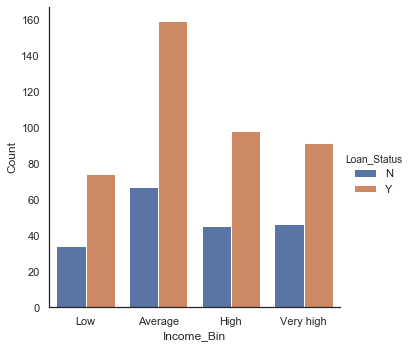

In [153]:
d = train.groupby(by=["Loan_Status","Income_Bin"], as_index=False)['Loan_ID'].count()
d.rename(columns={'Loan_ID':'Count'}, inplace=True)
print(d)
sns.catplot(x="Income_Bin",y="Count", hue="Loan_Status", data=d, kind="bar")

In [154]:
# Making bins for Coapplicant income variable
bins=[-1,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_Bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)

  Loan_Status Coapplicant_Income_Bin  Count
0           N                    Low     99
1           N                Average     61
2           N                   High     32
3           Y                    Low    196
4           Y                Average    161
5           Y                   High     65


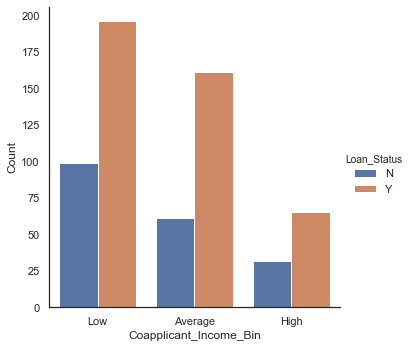

In [155]:
d = train.groupby(by=["Loan_Status","Coapplicant_Income_Bin"], as_index=False)['Loan_ID'].count()
d.rename(columns={'Loan_ID':'Count'}, inplace=True)
print(d)
sns.catplot(x="Coapplicant_Income_Bin",y="Count", hue="Loan_Status", data=d, kind="bar")

In [156]:
# Making bins for LoanAmount variable
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_Bin']=pd.cut(train['LoanAmount'],bins,labels=group)
train[['LoanAmount','LoanAmount_Bin']].head(10)

,LoanAmount,LoanAmount_Bin
0,NaN,NaN
1,128.0,Average
2,66.0,Low
3,120.0,Average
4,141.0,Average
5,267.0,High
6,95.0,Low
7,158.0,Average
8,168.0,Average
9,349.0,High


  Loan_Status LoanAmount_Bin  Count
0           N            Low     47
1           N        Average    103
2           N           High     31
3           Y            Low    107
4           Y        Average    255
5           Y           High     49


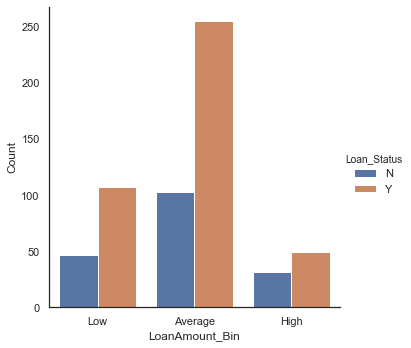

In [157]:
d = train.groupby(by=["Loan_Status","LoanAmount_Bin"], as_index=False)['Loan_ID'].count()
d.rename(columns={'Loan_ID':'Count'}, inplace=True)
print(d)
sns.catplot(x="LoanAmount_Bin",y="Count", hue="Loan_Status", data=d, kind="bar")

### Bivariate for continuous variables 

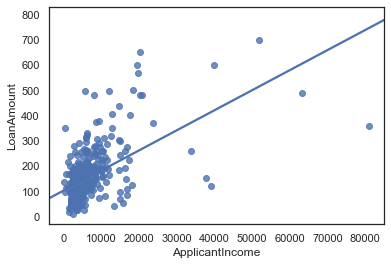

In [158]:
sns.regplot(x="ApplicantIncome", y = "LoanAmount", data = train,ci=False)

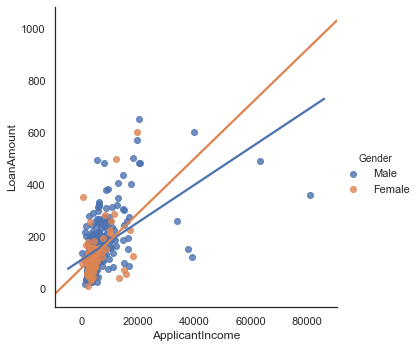

In [159]:
sns.lmplot(x="ApplicantIncome", y = "LoanAmount", hue='Gender',data = train,ci=False)

In [160]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Income_Bin', 'Coapplicant_Income_Bin', 'LoanAmount_Bin'],
      dtype='object')

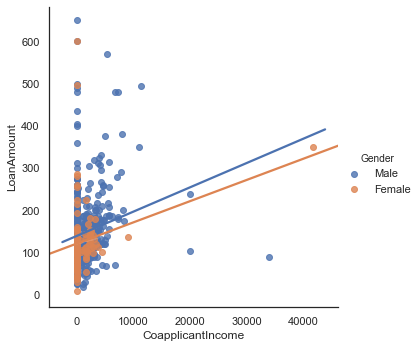

In [161]:
sns.lmplot(x="CoapplicantIncome", y = "LoanAmount", hue='Gender',data = train,ci=False)

## Data Wrangling 

In [162]:
# Drop the new variable of bins
train=train.drop(['Income_Bin', 'Coapplicant_Income_Bin', 'LoanAmount_Bin'], axis=1)

In [163]:
train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

### Replacing 3+ in Dependents with 3

In [164]:
train['Dependents'].replace(to_replace = ['0', '1', '2', '3+'], value=['0', '1','2', '3'],inplace=True)

In [165]:
train['Dependents'].value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

#### Loan_Status

In [166]:
# replacing Y and N in Loan_Status variable with 1 and 0 respectively
train['Loan_Status'].replace(to_replace =['N','Y'], value=[0,1],inplace=True)

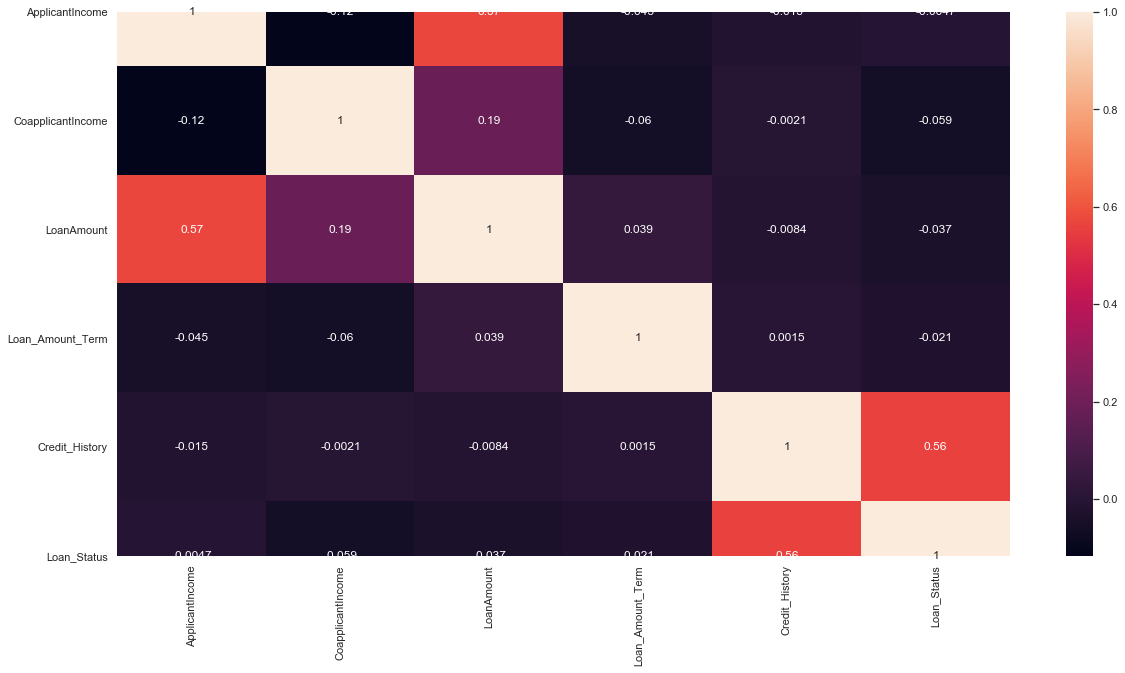

In [167]:
# Print correlation matrix to understand relationship between variables
matrix = train.corr()
sns.heatmap(matrix, annot=True)
plt.gcf().set_size_inches(20,10)

### Missing value and outlier treatment

In [168]:
s = train.isnull().sum()
s [ s > 0]

Gender              13
Married              3
Dependents          15
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64

## Replacing the missing values of categorical variables with the mode

In [169]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)

In [170]:
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [171]:
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)

In [172]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [173]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [174]:
train['LoanAmount'].mean(), train['LoanAmount'].median()

(146.41216216216216, 128.0)

In [175]:
# Replace missing values
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [176]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [177]:
## handle outliers in LoanAmount, ApplicantIncome, CoApplicantIncome 

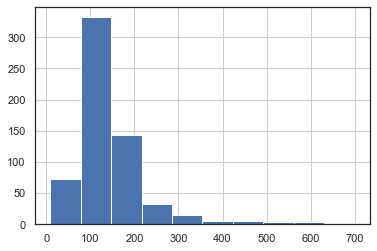

In [178]:
train['LoanAmount'].hist(bins=10)

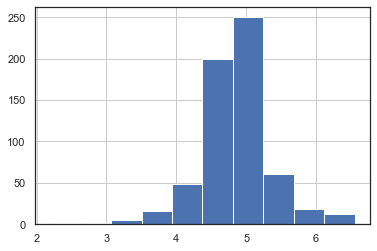

In [179]:
# Removing skewness in LoanAmount variable by log transformation
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=10)

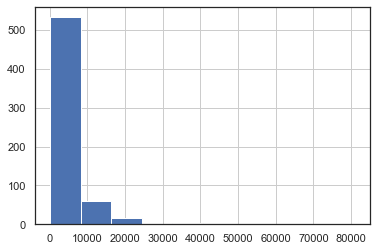

In [180]:
train['ApplicantIncome'].hist(bins=10)

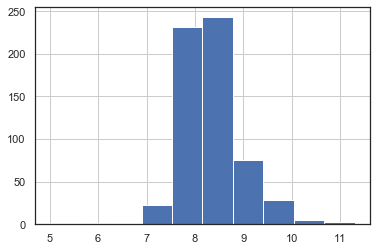

In [181]:
# Removing skewness in ApplicantIncome variable by log transformation
train['ApplicantIncome_log'] = np.log(train['ApplicantIncome'])
train['ApplicantIncome_log'].hist(bins=10)

In [182]:
# Removing skewness in CoapplicantIncome variable by log transformation
# train['CoapplicantIncome_log'] = np.log(train['CoapplicantIncome'])

In [183]:
# Drop loan_ID column 
train=train.drop('Loan_ID',axis=1)

In [184]:
train = train.drop(['LoanAmount','ApplicantIncome','CoapplicantIncome'],axis=1)

In [185]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log', 'ApplicantIncome_log'],
      dtype='object')

In [186]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
Gender                 614 non-null object
Married                614 non-null object
Dependents             614 non-null object
Education              614 non-null object
Self_Employed          614 non-null object
Loan_Amount_Term       614 non-null float64
Credit_History         614 non-null float64
Property_Area          614 non-null object
Loan_Status            614 non-null int64
LoanAmount_log         614 non-null float64
ApplicantIncome_log    614 non-null float64
dtypes: float64(4), int64(1), object(6)
memory usage: 52.9+ KB


In [187]:
# Adding dummies to the dataset for all categorical features 
train=pd.get_dummies(train)

In [188]:
train.columns

Index(['Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'LoanAmount_log',
       'ApplicantIncome_log', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3', 'Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [189]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 20 columns):
Loan_Amount_Term           614 non-null float64
Credit_History             614 non-null float64
Loan_Status                614 non-null int64
LoanAmount_log             614 non-null float64
ApplicantIncome_log        614 non-null float64
Gender_Female              614 non-null uint8
Gender_Male                614 non-null uint8
Married_No                 614 non-null uint8
Married_Yes                614 non-null uint8
Dependents_0               614 non-null uint8
Dependents_1               614 non-null uint8
Dependents_2               614 non-null uint8
Dependents_3               614 non-null uint8
Education_Graduate         614 non-null uint8
Education_Not Graduate     614 non-null uint8
Self_Employed_No           614 non-null uint8
Self_Employed_Yes          614 non-null uint8
Property_Area_Rural        614 non-null uint8
Property_Area_Semiurban    614 non-null uint8
Property_Area

In [190]:
# Save dataframe
train.to_csv("final_train.csv",index=False)

## Building logistic reg model

In [195]:
# Importing packages logistic regression and evaluation 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [200]:
y = train['Loan_Status']
X = train.drop(columns=['Loan_Status'])

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

X_train.shape, X_test.shape

((491, 19), (123, 19))

In [204]:
# logistic regression   
model = LogisticRegression()
model.fit(X_train,y_train)

G:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [205]:
model.score(X_train,y_train)

0.8044806517311609

In [206]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy_score :',score)   

Accuracy_score : 0.8292682926829268


## Display confusion matrix

In [207]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[14, 19],
       [ 2, 88]], dtype=int64)

In [208]:
print('Accuracy :', (14 + 88) / (14 + 88 + 2 + 19))

Accuracy : 0.8292682926829268


In [209]:
print('Sensitivity', 88 / (88+2))

Sensitivity 0.9777777777777777


In [210]:
print("Positive Precision :", 88/ (88 + 19))

Positive Precision : 0.822429906542056


In [211]:
print("Negative Precision :", 14 / (14 + 2))

Negative Precision : 0.875


## Display classification report

In [212]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



## Decision Tree

In [213]:
from sklearn.tree import DecisionTreeClassifier

In [214]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [215]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('accuracy_score',score)

accuracy_score 0.6829268292682927


In [216]:
confusion_matrix(y_test, y_pred)

array([[19, 14],
       [25, 65]], dtype=int64)

In [217]:
from sklearn.metrics import precision_score

In [218]:
precision_score(y_test,y_pred)

0.8227848101265823

In [219]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.43      0.58      0.49        33
           1       0.82      0.72      0.77        90

    accuracy                           0.68       123
   macro avg       0.63      0.65      0.63       123
weighted avg       0.72      0.68      0.70       123



## Random Forest

In [220]:
from sklearn.ensemble import RandomForestClassifier

In [221]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

G:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [223]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('accuracy_score',score)

accuracy_score 0.7560975609756098


## Load data from final csv

In [224]:
train = pd.read_csv("final_train.csv")

In [225]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('accuracy_score',score)   

accuracy_score 0.7560975609756098


In [226]:
confusion_matrix(y_test, y_pred)


array([[16, 17],
       [13, 77]], dtype=int64)

In [227]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.48      0.52        33
           1       0.82      0.86      0.84        90

    accuracy                           0.76       123
   macro avg       0.69      0.67      0.68       123
weighted avg       0.75      0.76      0.75       123



## Check cross validation scores with different algorithms 

In [228]:
train = pd.read_csv("final_train.csv")
train_o = pd.read_csv("loan_train.csv")
y = train_o.Loan_Status

In [229]:
train.columns

Index(['Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'LoanAmount_log',
       'ApplicantIncome_log', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3', 'Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [230]:
train =pd.get_dummies(train)

In [231]:
train.shape

(614, 20)

In [232]:
train.columns

Index(['Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'LoanAmount_log',
       'ApplicantIncome_log', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3', 'Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [233]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 20 columns):
Loan_Amount_Term           614 non-null float64
Credit_History             614 non-null float64
Loan_Status                614 non-null int64
LoanAmount_log             614 non-null float64
ApplicantIncome_log        614 non-null float64
Gender_Female              614 non-null int64
Gender_Male                614 non-null int64
Married_No                 614 non-null int64
Married_Yes                614 non-null int64
Dependents_0               614 non-null int64
Dependents_1               614 non-null int64
Dependents_2               614 non-null int64
Dependents_3               614 non-null int64
Education_Graduate         614 non-null int64
Education_Not Graduate     614 non-null int64
Self_Employed_No           614 non-null int64
Self_Employed_Yes          614 non-null int64
Property_Area_Rural        614 non-null int64
Property_Area_Semiurban    614 non-null int64
Property_Area

In [234]:
X = train
X.shape

(614, 20)

In [235]:
y.shape

(614,)

In [236]:
from sklearn.model_selection import cross_val_score
all_scores = {}

In [237]:
clf = LogisticRegression(random_state=1)
scores = cross_val_score(clf,X, y,cv=5)
print(scores)
print('The accuracy of LogisticRegression is %.2f%%' % (scores.mean()*100))
all_scores['LogisticRegression'] = ( scores.mean() * 100)

[1. 1. 1. 1. 1.]
The accuracy of LogisticRegression is 100.00%


G:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
G:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
G:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
G:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
G:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [238]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
scores = cross_val_score(clf,X, y,cv=5)
print(scores)
print('The accuration of GaussianNB is %.2f%%' % (scores.mean()*100))
all_scores['GaussianNB'] = scores.mean() * 100

[1. 1. 1. 1. 1.]
The accuration of GaussianNB is 100.00%


In [239]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
scores = cross_val_score(clf,X, y,cv=5)
print(scores)
print('The accuration of DecisionTreeClassifier is %.2f%%' % (scores.mean()*100))
all_scores['DecisionTreeClassifier'] = scores.mean() * 100

[1. 1. 1. 1. 1.]
The accuration of DecisionTreeClassifier is 100.00%


In [240]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier( n_estimators=10)
scores = cross_val_score(clf,X, y,cv=5)
print('The accuration of RandomForestClassifier is %.2f%%' % (scores.mean()*100))
all_scores['RandomForestClassifier'] = scores.mean() * 100

The accuration of RandomForestClassifier is 99.67%


[Text(0, 0, 'LogisticRegression'),
 Text(0, 0, 'GaussianNB'),
 Text(0, 0, 'DecisionTreeClassifier'),
 Text(0, 0, 'RandomForestClassifier')]

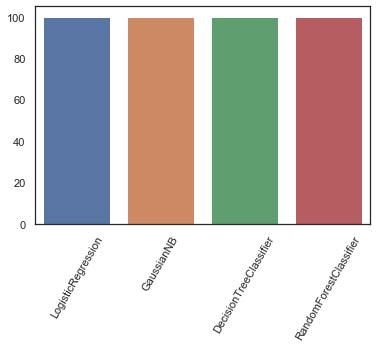

In [241]:
all_scores.keys()
all_scores.values()
plt = sns.barplot(x = list(all_scores.keys()), y = list(all_scores.values()))
plt.set_xticklabels(labels = all_scores.keys(),rotation=60)

### Logestic Regression with built-in Cross Validation

In [242]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=5, random_state=0).fit(X_train, y_train)

G:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
G:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
G:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
G:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
G:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
G:\anaconda3\lib\site-packages\sklearn\linear_mode

In [243]:
y_pred = clf.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy_score : ',score)   

Accuracy_score :  0.8292682926829268
